In [1]:
import pandas as pd
import numpy as np

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])

In [3]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [4]:
dates = pd.date_range('20130101', periods=6)

In [5]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df = pd.DataFrame(np.random.randn(6,4),index=dates, columns=list('ABCD'))

In [7]:
df

,A,B,C,D
2013-01-01,0.361792,-0.932312,-2.444829,1.113799
2013-01-02,2.918067,0.599605,-1.003923,0.097958
2013-01-03,0.849330,2.002761,1.619002,0.949387
2013-01-04,0.748916,-0.894495,0.738755,0.828300
2013-01-05,-0.302591,-0.389954,-0.196724,-0.642507
2013-01-06,1.471634,0.265896,-0.337296,0.289554


In [8]:
df = pd.DataFrame([[1,1]], columns=list('AB'))


In [9]:
df

,A,B
0,1,1


In [10]:
a=0
b=1
for _ in range(1000):
    df2 = pd.DataFrame([[a,b]], columns=list('AB'))
    df = df.append(df2, ignore_index=True)
    a+=1
    b+=1

In [11]:
df

,A,B
0,1,1
1,0,1
2,1,2
3,2,3
4,3,4
...,...,...
996,995,996
997,996,997
998,997,998
999,998,999


In [12]:
df.append(pd.Series([1,2]),ignore_index=True)

,A,B,0,1
0,1.0,1.0,NaN,NaN
1,0.0,1.0,NaN,NaN
2,1.0,2.0,NaN,NaN
3,2.0,3.0,NaN,NaN
4,3.0,4.0,NaN,NaN
...,...,...,...,...
997,996.0,997.0,NaN,NaN
998,997.0,998.0,NaN,NaN
999,998.0,999.0,NaN,NaN
1000,999.0,1000.0,NaN,NaN


In [13]:
df.append(pd.Series([5,6]),ignore_index=True)

,A,B,0,1
0,1.0,1.0,NaN,NaN
1,0.0,1.0,NaN,NaN
2,1.0,2.0,NaN,NaN
3,2.0,3.0,NaN,NaN
4,3.0,4.0,NaN,NaN
...,...,...,...,...
997,996.0,997.0,NaN,NaN
998,997.0,998.0,NaN,NaN
999,998.0,999.0,NaN,NaN
1000,999.0,1000.0,NaN,NaN


In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [72]:
path = '/home/donghyun/RL_study/ReinforcementLearning_study/deep_reinforcement_learning/gym_env/a2c/csv_log'
files = os.listdir(path)
files

['1_1_train.csv', '1_2_train.csv']

In [74]:
csv_list=[]
for file in files:
    csv_list.append(pd.read_csv(path+'/'+file))
data1 = csv_list[0]
data2 = csv_list[1]
data1= pd.DataFrame([data1['step'],data1['value']]).T
data2= pd.DataFrame([data2['step'],data2['value']]).T
data1 = data1.rename(columns={'value':'return'})
data2 = data2.rename(columns={'value':'len'})
data1


,step,return
0,0.0,12.0
1,10.0,15.0
2,20.0,18.0
3,30.0,12.0
4,40.0,14.0
...,...,...
84,840.0,132.0
85,850.0,138.0
86,860.0,165.0
87,870.0,238.0


In [67]:
data

,step,return,len
0,0.0,12.0,13.0
1,10.0,15.0,16.0
2,20.0,18.0,19.0
3,30.0,12.0,13.0
4,40.0,14.0,15.0
...,...,...,...
84,840.0,132.0,133.0
85,850.0,138.0,139.0
86,860.0,165.0,166.0
87,870.0,238.0,239.0


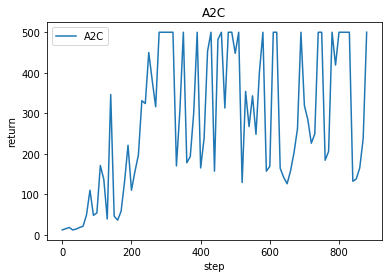

In [82]:
fig = sns.lineplot(x='step',y='return',data=data)
fig.set_title("A2C")
fig.legend(['A2C'])
plt.show()